# Boat Sales Analysis

### Part 4 - Linear Regression

#### Intro

Regression analysis is used to assess the relationships between a continuous independent variable (or variables) and a dependent variable (the one you’re trying to predict). 
    
Regression analysis produces an equation whose coefficients represent the kind of relationship that exists between each independent variable and the dependent variable. This equation can then be used to make predictions. In general, regression analysis looks for how the rise and fall of an independent variable influences the dependent variable

#### Content
1. Import Libraries
2. Load data set 
3. Preparing Data 
4. Regression Analysis (Price vs Length)
5. Regression Analysis (Price vs Width)
6. Export data set

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. Load Data Set

In [2]:
# Set path to access data files
path = r'C:\Users\tsoew\OneDrive\Desktop\Boat Sales Analysis'

In [3]:
# Import data file that has been prepared for regression analysis
# It contains only new boat set
df = pd.read_csv (os.path.join(path, 'Data', 'Prepared Data', 'newboat_data_split.csv'), index_col=False)

# try to use the full version of data set
# df = pd.read_csv (os.path.join(path, 'Data', 'Prepared Data', 'boat_data_final.csv'), index_col=False)


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Check data head
df.head()

,Length,Width,Views,Price_USD,Age
0,4.00,1.90,226,3667.363,7
1,4.00,1.50,75,3751.750,4
2,3.00,1.00,64,3703.700,4
3,3.55,1.46,58,3653.925,5
4,3.64,1.37,45,3582.975,5


In [6]:
df.shape

(1888, 5)

### 3. Preparing Data

In [7]:
# Check for missing values
df.isnull().sum()

Length       0
Width        0
Views        0
Price_USD    0
Age          0
dtype: int64

In [8]:
# Check for duplicates
dups = df.duplicated()
dups.shape

(1888,)

### Extreme values check

#### Check extreme values for Boat Price

C:\Users\tsoew\AppData\Local\Temp\ipykernel_9888\3009283478.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_USD'], bins=25)
C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_USD', ylabel='Density'>

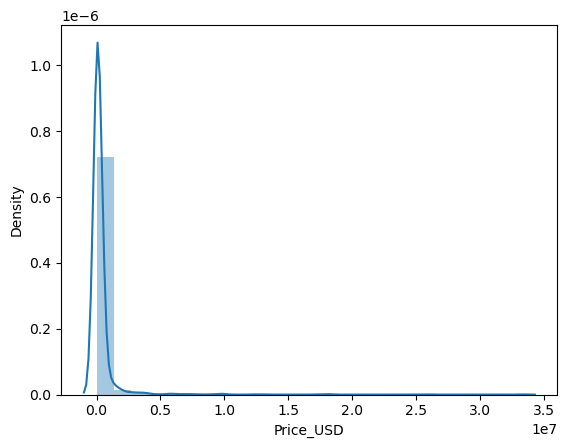

In [9]:
# Shows extreme values for Price
sns.distplot(df['Price_USD'], bins=25) 

In [10]:
# Check Price statistic
df['Price_USD'].describe()

count    1.888000e+03
mean     3.331008e+05
std      1.485851e+06
min      3.547500e+03
25%      3.840456e+04
50%      6.939985e+04
75%      1.714563e+05
max      3.332500e+07
Name: Price_USD, dtype: float64

#### Remove outliers

In [11]:
# Remove price with extreme values (>= 10M)
df = df[df['Price_USD'] < 1000000]

In [12]:
df['Price_USD'].describe()

count      1786.000000
mean     123406.899573
std      151238.252264
min        3547.500000
25%       37086.693750
50%       65450.980000
75%      145125.000000
max      999937.500000
Name: Price_USD, dtype: float64

#### Check extreme values for Boat Length

C:\Users\tsoew\AppData\Local\Temp\ipykernel_9888\4200467057.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], bins=25)
C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Length', ylabel='Density'>

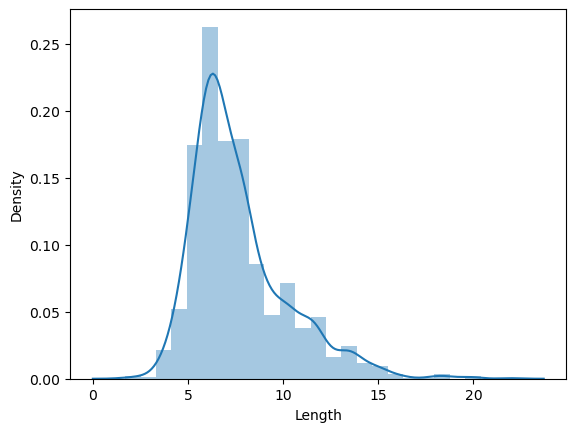

In [13]:
# Shows extreme values for Length
sns.distplot(df['Length'], bins=25) 

In [14]:
df['Length'].describe()

count    1786.000000
mean        7.670196
std         2.523938
min         1.700000
25%         6.000000
50%         7.000000
75%         8.800000
max        22.000000
Name: Length, dtype: float64

#### Note:
There is not extreme value for boat length.

#### Check extreme values for Boat Width

C:\Users\tsoew\AppData\Local\Temp\ipykernel_9888\1789141783.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Width'], bins=25)
C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Width', ylabel='Density'>

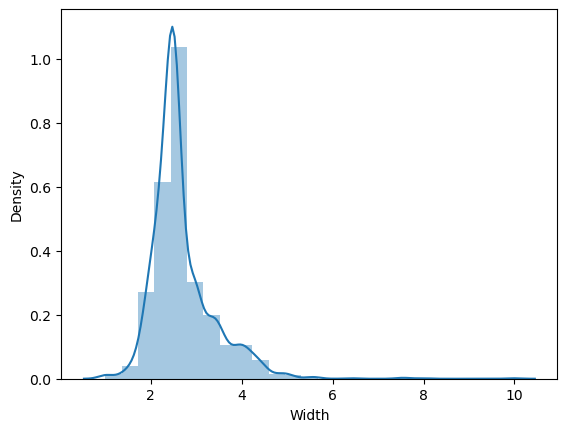

In [15]:
# Shows extreme values for Length
sns.distplot(df['Width'], bins=25) 

In [16]:
df['Width'].describe()

count    1786.000000
mean        2.686702
std         0.698457
min         1.000000
25%         2.300000
50%         2.500000
75%         2.970000
max         9.980000
Name: Width, dtype: float64

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


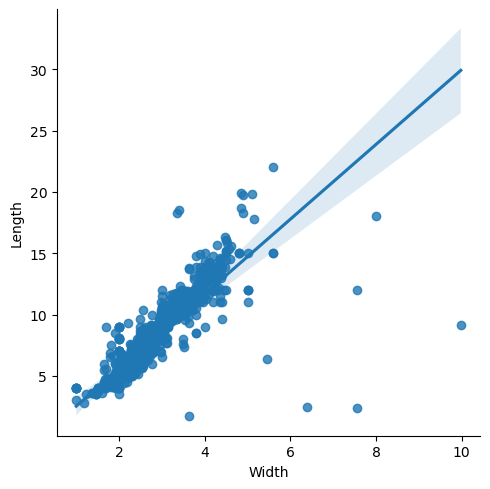

In [17]:
# check the correlation between width and length
scatterplot = sns.lmplot(x = 'Width', y = 'Length', data = df)

#### Remove outliers

In [18]:
# Check for boats that have width > 5 but length < 10
result = df.loc[(df['Width'] > 3) & (df['Length'] < 5)]
result

,Length,Width,Views,Price_USD,Age
379,2.36,7.55,220,102207.0,5
737,1.70,3.64,191,494500.0,4
1319,2.48,6.40,209,67258.8,4


In [19]:
# Check for boats that have width > 5 but length < 10
result = df.loc[(df['Width'] > 5) & (df['Length'] < 10)]
result

,Length,Width,Views,Price_USD,Age
379,2.36,7.55,220,102207.0,5
462,9.12,9.98,36,156842.5,4
1319,2.48,6.40,209,67258.8,4
1428,6.40,5.45,119,50417.5,5


In [20]:
# Remove outlier with indexes: 379, 462, 878, 1319, 1428
df.drop(379, axis=0, inplace=True)
df.drop(462, axis=0, inplace=True)
df.drop(737, axis=0, inplace=True)
df.drop(878, axis=0, inplace=True)
df.drop(1319, axis=0, inplace=True)
df.drop(1428, axis=0, inplace=True)

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


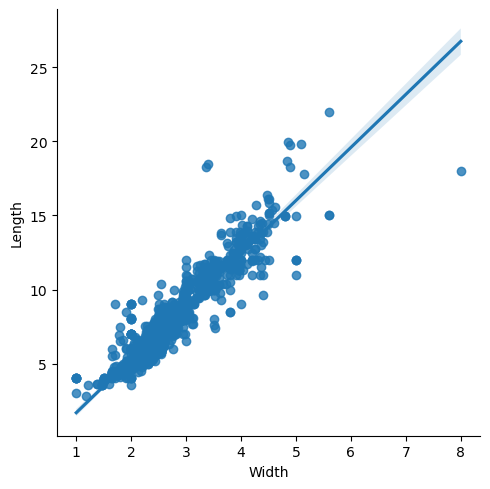

In [21]:
# check the correlation between width and length
scatterplot = sns.lmplot(x = 'Width', y = 'Length', data = df)

### --------------------------------------------------------------------
### 4. Regression Analysis between Length and Price
### --------------------------------------------------------------------

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


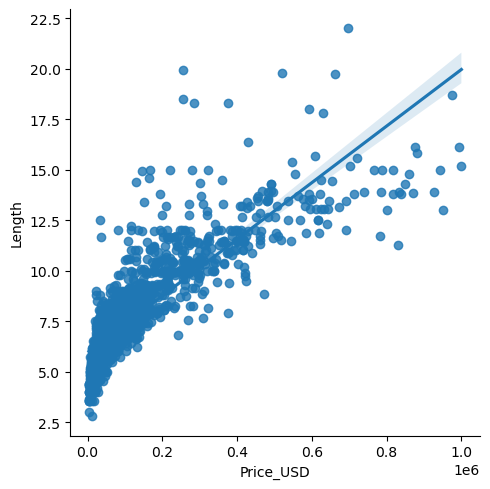

In [22]:
# Check correlation between Price and Length
scatterplot = sns.lmplot(data=df, x ='Price_USD', y='Length')

#### Reshape variables

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Length'].values.reshape(-1,1)
y = df['Price_USD'].values.reshape(-1,1)

#### Split data

Here, you’re creating two sets of data (further divided into X and y): X_train and X_test, and y_train and y_test. The “train” versions will be used to train the model, and the “test” versions will be used to test the model’s performance. The test_size = 0.3 argument within the function is specifying that the test set should comprise 30 percent of the data (thus making the training set 70 percent of the data).

In [24]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Create a regression object.

In [25]:
# This is the regression object, which will be fit onto the training set.
regression = LinearRegression()  

In [26]:
# Fit the regression object onto the training set. (70% of the data)
regression.fit(X_train, y_train)

LinearRegression()

#### Run the prediction

In [27]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

#### Show regression line

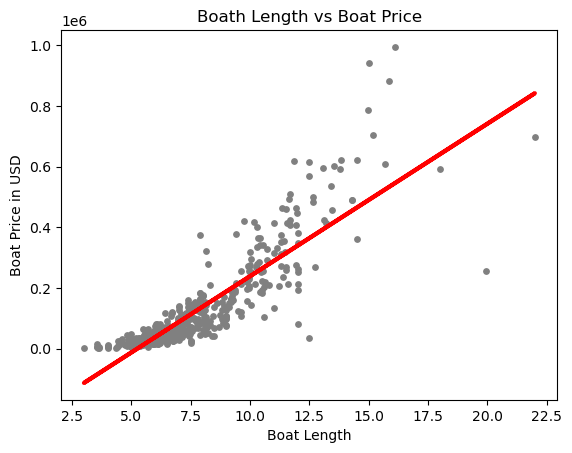

In [28]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Boath Length vs Boat Price')
plot_test.xlabel('Boat Length')
plot_test.ylabel('Boat Price in USD')
plot_test.show()

## Model Summary Statistics

In [29]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

#### Values before removing extreme values in Prices

- Slope: [[269838.54651125]]
- Mean squared error:  626835935181.4089
- R2 score:  0.5606402889013431

In [30]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[50233.20945871]]
Mean squared error:  5435312058.306995
R2 score:  0.7547219567796105


### Result interpretation

- **Hypothesis: We can make prediction of Boat Price from knowing Boat Size (Width & Length)**
- The Slope indicates a positive value, so as X rises, so does y. Coefficient of 48975 indicates that
every additional 1 meter of boat length will increase boat price by $48,975.
- The MSE value is quite large. This value indicates that this model provides a poor prediction on Boat Price,
based on the value of Boat Length.
- The R2 Score is 0.727 which is closer to 1 than 0. This value shows that there is a good fit between two variables.
</br>
- **Conclusion: Boat Length is not a good element to predict Boat Price**





### Variable definition

#### Slope

The slope is a coefficient that tells you how the y variable changes when X changes. 
A negative slope value indicates a negative relationship (as X rises, y drops), and a 
positive slope indicates a positive relationship (as X rises, so does y). A coefficient 
of zero would mean that as X rises, y stays the same. 

#### MSE (Mean Squared Error)
- Small = good fit
- Large = poor fit

MSE is an estimator that **measures the average of the squared 
difference between the estimated values and the true values.** Put more simply, it tells you 
how close a regression line is to a set of points (i.e., its accuracy). It does so by taking 
the distances from the points to the regression line and squaring them. 

### R2 Score (r-squared value)
- Close to 0 = poor fit
- Close to 1 = good fit

R2 score is **a metric that tells you how well the model explains the variance in the data.** It’s a 
number (usually) between 0 and 1, where values closer to 0 indicate a poor fit, and values 
closer to 1 indicate a good fit. It can also take a negative value if the model fits worse 
than a horizontal line.

In [31]:
y_predicted

array([[ 6.23422606e+04],
       [ 8.09039435e+03],
       [ 1.13580134e+05],
       [ 1.75869314e+05],
       [-1.45145499e+04],
       [ 1.81370362e+04],
       [ 2.31603572e+04],
       [-1.95624754e+03],
       [ 4.82769619e+04],
       [ 1.63813344e+05],
       [ 1.98474258e+05],
       [-1.20028894e+04],
       [ 5.83236038e+04],
       [ 3.82303200e+04],
       [ 1.43720060e+05],
       [ 1.38696739e+05],
       [ 1.43720060e+05],
       [-8.23293827e+04],
       [ 4.82769619e+04],
       [ 1.31137153e+04],
       [ 3.77304484e+05],
       [ 3.92349842e+04],
       [ 3.03963998e+05],
       [-4.21428151e+04],
       [-1.70262104e+04],
       [ 8.84635295e+04],
       [ 4.32536410e+04],
       [ 2.89396367e+05],
       [ 2.47702803e+05],
       [ 1.38696739e+05],
       [ 3.05973326e+05],
       [ 1.50752709e+05],
       [ 6.23422606e+04],
       [ 2.74326404e+05],
       [ 1.40203735e+05],
       [ 3.62209916e+04],
       [ 6.33469248e+04],
       [ 2.69303084e+05],
       [ 4.7

In [32]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,54939.010,62342.260564
1,11634.725,8090.394349
2,63425.000,113580.134212
3,110983.000,175869.313941
4,12528.600,-14514.549908
5,31164.250,18137.036240
6,37893.750,23160.357186
7,34217.250,-1956.247543
8,55103.860,48276.961915
9,136525.000,163813.343671


### Conclusion

We cannot use Boat Length to make a good prediction of Boat Price





### --------------------------------------------------------------------
### 5. Regression Analysis between Width and Price
### --------------------------------------------------------------------

C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


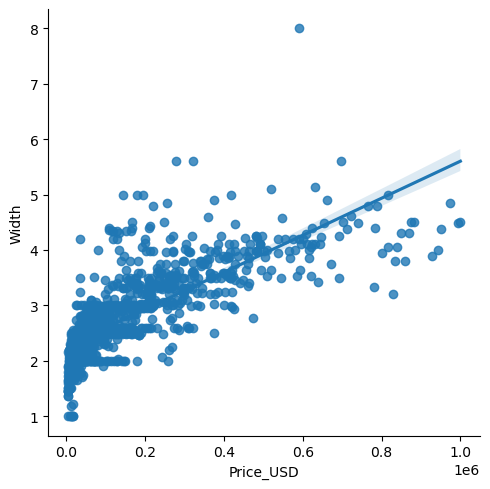

In [33]:
# Check correlation between Price and Width
scatterplot = sns.lmplot(data=df, x ='Price_USD', y='Width')

#### Reshape variables

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Width'].values.reshape(-1,1)
y = df['Price_USD'].values.reshape(-1,1)

#### Split data

In [35]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Create a regression object.

In [36]:
# This is the regression object, which will be fit onto the training set.
regression = LinearRegression()  

In [37]:
# Fit the regression object onto the training set. (70% of the data)
regression.fit(X_train, y_train)

LinearRegression()

#### Run the prediction

In [38]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

#### Show regression line

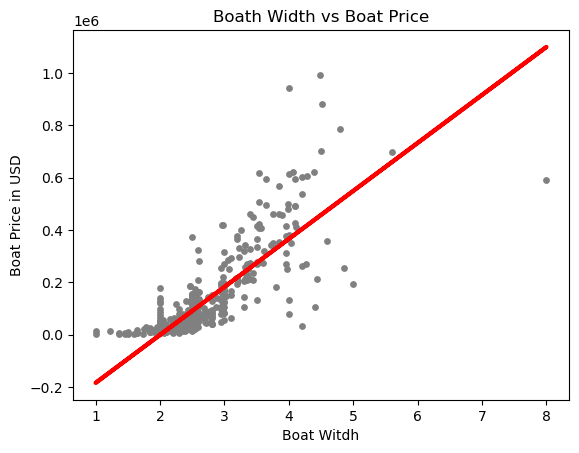

In [39]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Boath Width vs Boat Price')
plot_test.xlabel('Boat Witdh')
plot_test.ylabel('Boat Price in USD')
plot_test.show()

In [40]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

### Model Summary Statistics

In [41]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[183445.25243635]]
Mean squared error:  8182895501.251258
R2 score:  0.630732407837314


### Result interpretation

- **Hypothesis: We can make prediction of Boat Price from knowing Boat Size (Width & Length)**
- The Slope indicates a positive value, so as X rises, so does y. Coefficient of 183445 indicates that
every additional 1 meter of boat width will increase boat price by $183,445.
- The MSE value is quite large. This value indicates that this model provides a poor prediction on Boat Price,
based on the value of Boat Width.
- The R2 Score is 0.63 which is closer to 1 than 0. This value shows that there maybe a good fit between two variables.
</br>
- **Conclusion: Boat Width cannot be used to make a good prediction of Boat Price**





In [42]:
y_predicted

array([[ 9.10613053e+04],
       [ 1.76832043e+04],
       [ 9.65646629e+04],
       [ 1.07571378e+05],
       [-1.90058462e+04],
       [ 4.88688972e+04],
       [ 4.70344447e+04],
       [ 1.76832043e+04],
       [ 7.27167801e+04],
       [ 1.71777216e+05],
       [ 2.01128457e+05],
       [-6.61320916e+02],
       [ 1.09405831e+05],
       [ 6.17100649e+04],
       [ 9.65646629e+04],
       [ 9.83991154e+04],
       [ 1.02068020e+05],
       [-7.40394219e+04],
       [ 3.23588245e+04],
       [ 5.25378023e+04],
       [ 4.13924950e+05],
       [ 6.17100649e+04],
       [ 3.58891374e+05],
       [-6.48671593e+04],
       [-9.83358354e+03],
       [ 9.10613053e+04],
       [ 5.43722548e+04],
       [ 1.80949479e+05],
       [ 1.79115026e+05],
       [ 9.10613053e+04],
       [ 2.56162032e+05],
       [ 1.09405831e+05],
       [ 9.10613053e+04],
       [ 2.56162032e+05],
       [ 1.42425976e+05],
       [ 4.70344447e+04],
       [ 1.00233568e+05],
       [ 2.37817507e+05],
       [ 8.0

In [43]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,54939.010,91061.305302
1,11634.725,17683.204328
2,63425.000,96564.662875
3,110983.000,107571.378022
4,12528.600,-19005.846160
5,31164.250,48868.897242
6,37893.750,47034.444718
7,34217.250,17683.204328
8,55103.860,72716.780059
9,136525.000,171777.216374


### 6. Export file

In [44]:
# Export the modified dataframe
df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'regression_data.csv'))

### Conclusion

The prediction model we use in this exercise fails to predict boat price using boat 
size variables (width and length). Although we already slice the data to predict only
new boats, and remove all extreme values in the variables, there are still big margins
of errors in the prediction result. Therefore we cannot use this regression model for
our purpose.

#### Data bias

Since this data set covers boats from different part of the worlds, there are no specific
boat standard price. Also boat size alone may not determine the price of the boat since there
are more variables involved such boat type, manufacturer, material, and type of gasoline.
When we do more comprehentive analysis there is better chance of improved prediction.

### End of Boat Analysis Part 4